In [108]:
from neuron import h
from neuron.units import ms, mV, µm
import numpy as np
import matplotlib.pyplot as plt

h.load_file('stdrun.hoc')  # 加载 NEURON 基本库

1.0

In [ ]:
# 创建神经元（等效于 `create a`）
axon = h.Section(name="axon")
axon.nseg = 1001  # 只有 1 段
axon.L = 20000 * µm
axon.diam = 4 * µm

In [117]:
# **插入生理机制**
axon.insert('hh')
axon.insert("pas")  # 被动特性
axon.g_pas = 3e-5  # 传导率
axon.cm = 1  # 膜电容
axon.e_pas = -65  # 静息电位

In [ ]:
# **插入 `extracellular` 机制**
axon.insert("extracellular")
for seg in axon:
    seg.xraxial[0] = 1e9
    seg.xraxial[1] = 1e9
    seg.xg[0] = 1e9
    seg.xg[1] = 1e9
    seg.xc[0] = 0
    seg.xc[1] = 0
    seg.e_extracellular = 0

In [112]:
# **记录变量**
t = h.Vector().record(h._ref_t)  # 记录时间
v_m = h.Vector().record(axon(0.5)._ref_v)  # 记录膜电位
v_ext = h.Vector().record(axon(0.5)._ref_vext[0])  # 记录细胞外电位

In [113]:
# **外部电流刺激**
stim = h.IClamp(axon(0.5))  # 施加刺激
stim.delay = 0.5 * ms  # 0.5ms 开始
stim.dur = 1 * ms  # 持续 1ms
stim.amp = 1 * (np.pi * axon.diam * axon.L / 100)  # 外部刺激电流

In [114]:
# **运行仿真**
h.finitialize(-65 * mV)
h.continuerun(10 * ms)  # 仿真时间 2ms

0.0

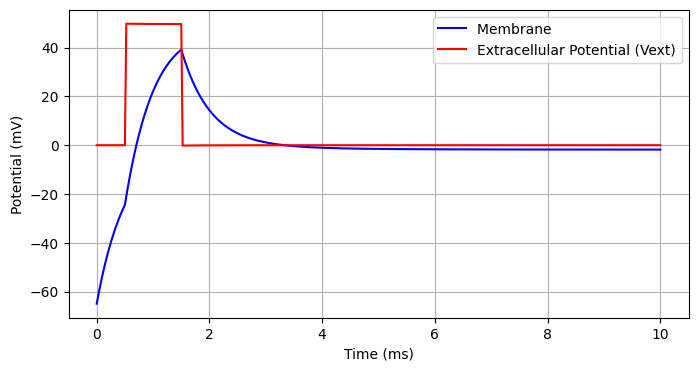

In [115]:
# **绘制结果**
plt.figure(figsize=(8, 4))
#plt.plot(t, np.array(v_m) + np.array(v_ext), label="Membrane + Extracellular Potential", color='blue')
plt.plot(t, np.array(v_m) , label="Membrane ", color='blue')
plt.plot(t, v_ext, label="Extracellular Potential (Vext)", color='red')
plt.xlabel("Time (ms)")
plt.ylabel("Potential (mV)")
plt.legend()
plt.grid()
plt.show()